In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
import scipy
from pydub import AudioSegment

ModuleNotFoundError: No module named 'pydub'

In [ ]:
f = 'data/povezlo-povezlo.wav'

samplerate, data = wavfile.read(f)
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

Sampling Rate: 44100
Audio Shape: (80640, 2)


In [ ]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
print(f"длительность {duration} \n временная шкала {time}")


длительность 1.8285714285714285 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.82850340e+00
 1.82852608e+00 1.82854875e+00]


In [ ]:
type(data)

numpy.ndarray

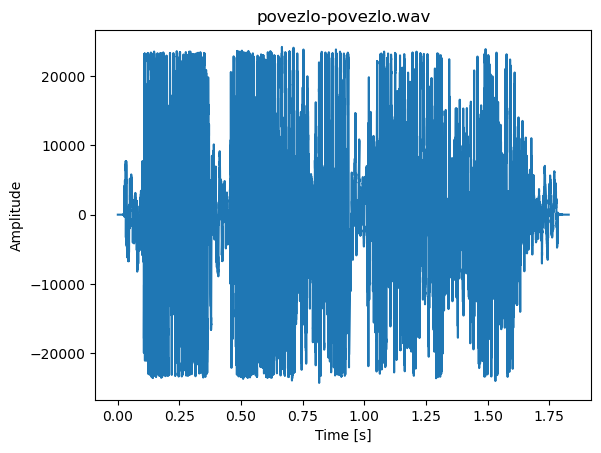

In [ ]:
plt.plot(time, data[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('povezlo-povezlo.wav')
plt.show()

In [ ]:
# слушаем, что получилось
sd.play(data[:, 0], samplerate)
sd.wait()

In [ ]:
asegment = AudioSegment.from_wav(f)
asegment = asegment.set_channels(1)
asegment.export("mono.wav",format="wav")
s,a = wavfile.read("mono.wav")

print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate)
na = data.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

NameError: name 'AudioSegment' is not defined

In [ ]:
adata = data[:, 0]
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq

N = int(samplerate * duration)
yf = fft(data[:, 0])
xf = fftfreq(N, 1 / samplerate)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

In [ ]:
from scipy.fft import rfft, rfftfreq

rN = int(samplerate * duration)
ryf = rfft(data[:, 0])
rxf = rfftfreq(rN, 1 / samplerate)
plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

In [ ]:
points_per_freq = len(rxf) / (samplerate / 2)

target_idx = int(points_per_freq * 200)

target_idx1 = int(points_per_freq * 10000)

ryf[target_idx-2:target_idx+2] = 0
plt.plot(rxf, np.abs(ryf))
plt.show()